## <font color='red'>AFM data analysis</font> 
### The purpose of this code is data analysis and ploting of the AFM data which are first analyzed with a set of MATLAB codes on this Mac.
#### /Users/erezaei/Desktop/SU-Research/AFM_Bruker/2022/AFM_Analysis.m
#### Ehsan Rezaei June 8th, 2022

In [1]:
import pandas as pd
import seaborn as sns
 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import dataframe_image as dfi

#from utils import *
from scipy.stats import mannwhitneyu, normaltest

from statannotations.Annotator import Annotator
import dabest
import matplotlib.ticker as ticker
from scipy.stats import f_oneway

# Plotting and Statistical test source:
https://github.com/trevismd/statannotations-tutorials/blob/main/Tutorial_1/Statannotations-Tutorial-1.ipynb
and:
https://github.com/trevismd/statannotations
and:
https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb

In [2]:
AFMdata = pd.read_excel('Results.xlsx')
#rfs = df_Wstiff.loc[(df_Wstiff.Treatment.isin(("Regular", "5 mM", "8 mM", "10 mM", "30 mM"))), :]

In [3]:
Genotyps_lst=AFMdata['WormStrain'].unique().tolist()
Genotyps_list = [x for x in Genotyps_lst if str(x) != 'nan']

In [4]:
for Strains in Genotyps_list:
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    print(df_strn)

        ID  Annuli_mean  Annuli_std  Annuli_count   Furrow_mean   Furrow_std  \
0   AFM001     2.330046    0.781676         173.0     52.188071    13.744742   
1   AFM002     1.745403    0.140833         193.0     43.496210    10.596187   
2   AFM003     1.894148    0.203990         256.0     48.211179     7.309807   
3   AFM004     1.607322    0.502756         301.0     45.716173    12.246678   
4   AFM005     1.569823    0.208321         328.0     80.509292    12.401378   
..     ...          ...         ...           ...           ...          ...   
82  AFM083     1.941626    0.647404         305.0     65.428173    16.045231   
83  AFM084     1.819638    0.087267         257.0     43.015407     9.591564   
84  AFM085     2.125792    0.244632         260.0     45.738289    10.881323   
85  AFM086     1.974212    0.143834         257.0     47.209942     8.376475   
86  AFM087     1.423183    0.563858         340.0     47.055835    13.519880   

     Furrow_count   DMT_mean   DMT_std 

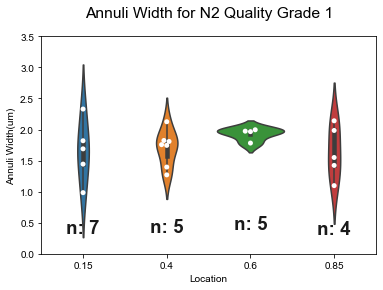

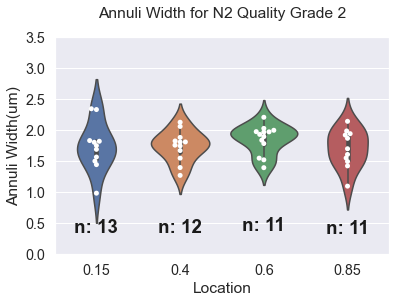

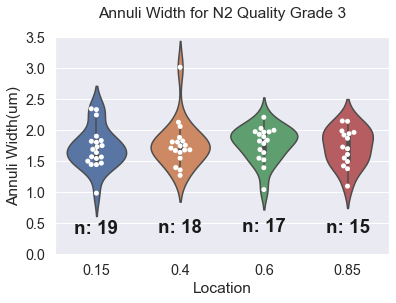

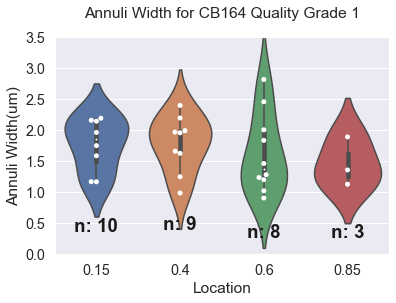

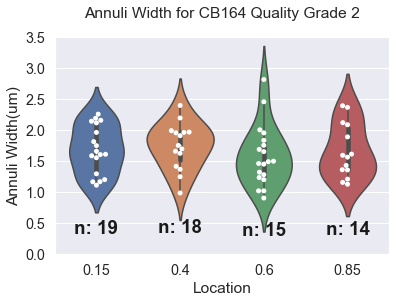

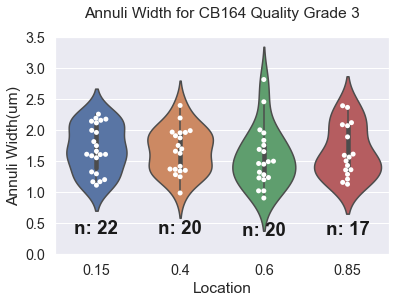

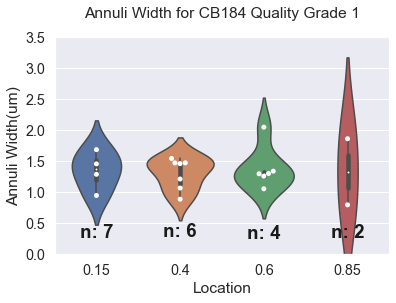

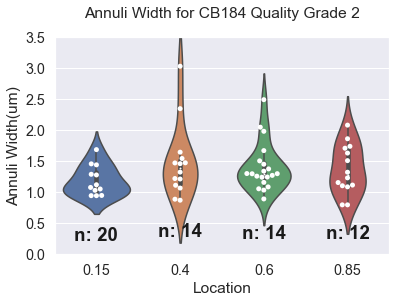

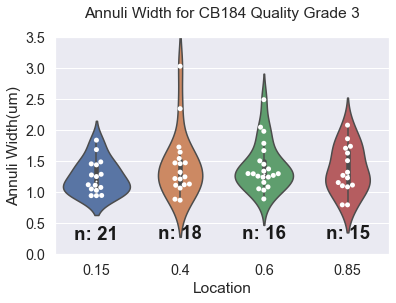

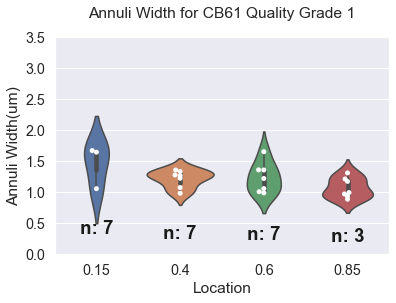

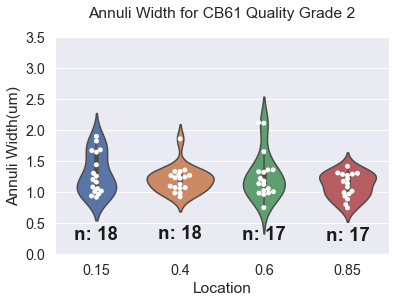

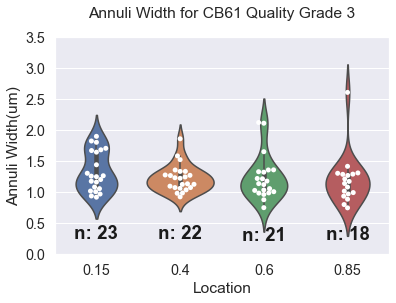

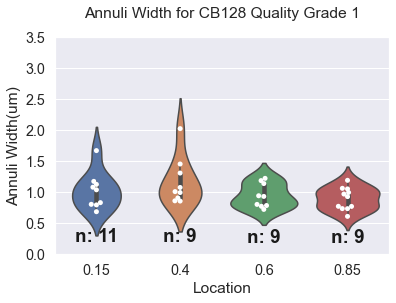

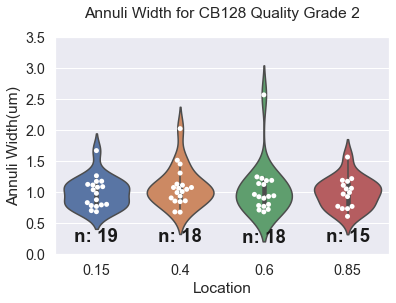

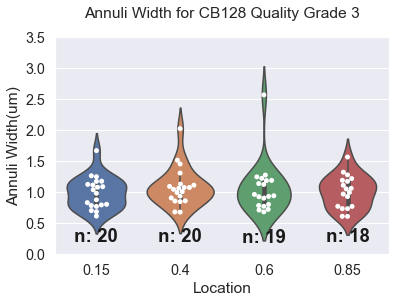

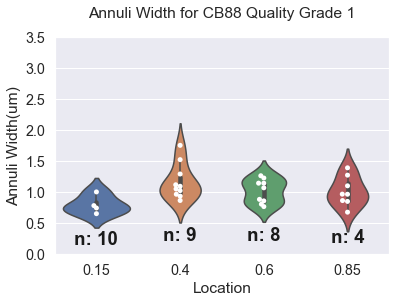

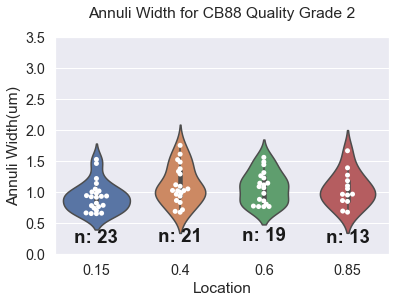

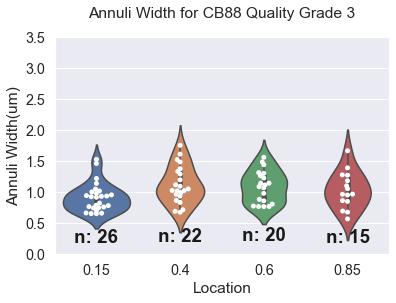

In [5]:
#df = AFMdata[AFMdata['Img Quality'] <= ImgQual]
ImgQual=3
for Strains in Genotyps_list:
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    for ImgQual in range(1,4):
        df = df_strn[df_strn['Img Quality'] <= ImgQual]
        axxFig = sns.violinplot(x="Location", y="Annuli_mean", data=df_strn[df_strn['Img Quality'] <= ImgQual])
        axxFig = sns.swarmplot(x="Location", y="Annuli_mean", data=df_strn[df_strn['Img Quality'] <= ImgQual], color="white", edgecolor="gray")
        sns.set(font_scale = 1.3)
        # Calculate number of obs per group & median to position labels
        medians = df.groupby(["Location"])['Annuli_mean'].median().values
        nobs = df['Location'].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]

        # Add text to the figure
        pos = range(len(nobs))
        for tick, label in zip(pos, axxFig.get_xticklabels()):
            axxFig.text(pos[tick], medians[tick] - .8*medians[tick], nobs[tick],
                    horizontalalignment='center',
                    size='large',
                    color='k',
                    weight='semibold')
        axxFig.set(ylim=(0, 3.5))
        axxFig.set_ylabel("Annuli Width(um)")
        axxFig.set_xlabel("Location")
        plt.title("Annuli Width for %s Quality Grade %d" % (Strains,ImgQual), y=1.06)
        plt.show()
        axxFig.figure.savefig(str(Strains) + 'Grade'+str(ImgQual)+'.tiff', dpi=100, bbox_inches='tight')

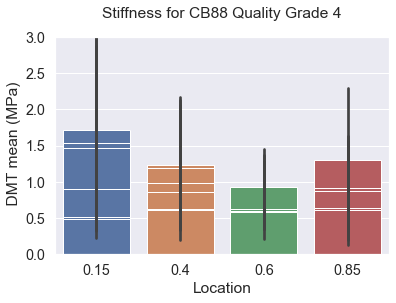

In [6]:
for Strains in Genotyps_list:
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    for ImgQual in range(1,5):
        df = df_strn[df_strn['Img Quality'] <= ImgQual]
        axxFig = sns.barplot(x="Location", y=" DMT_mean", data=df_strn[df_strn['Img Quality'] <= ImgQual])
        #axxFig = sns.swarmplot(x="Location", y="Annuli_mean", data=df_strn[df_strn['Img Quality'] <= ImgQual], color="white", edgecolor="gray")
        sns.set(font_scale = 1.3)
        # Calculate number of obs per group & median to position labels
        medians = df.groupby(["Location"])[" DMT_mean"].median().values
        nobs = df['Location'].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]

        # Add text to the figure
#     pos = range(len(nobs))
#     for tick, label in zip(pos, axx.get_xticklabels()):
#         axxFig.text(pos[tick], medians[tick] - .8*medians[tick], nobs[tick],
#                 horizontalalignment='center',
#                 size='large',
#                 color='k',
#                 weight='semibold')
        axxFig.set(ylim=(0, 3))
        axxFig.set_ylabel(" DMT mean (MPa)")
        axxFig.set_xlabel("Location")
        plt.title("Stiffness for %s Quality Grade %d" % (Strains,ImgQual), y=1.06)
#        plt.show()
 #       axxFig.figure.savefig('Stiff_'+str(Strains) + 'Grade'+str(ImgQual)+'.tiff', dpi=100, bbox_inches='tight')

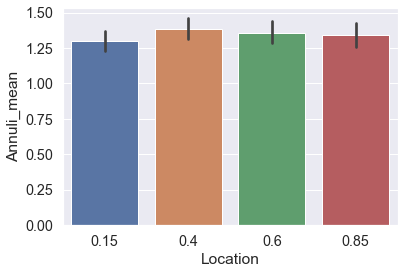

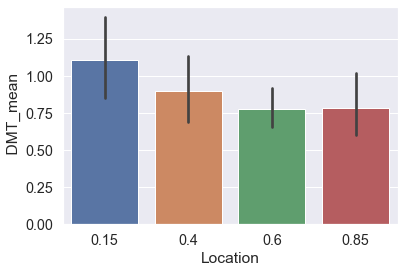

<AxesSubplot:xlabel='Location', ylabel='Annuli_mean'>

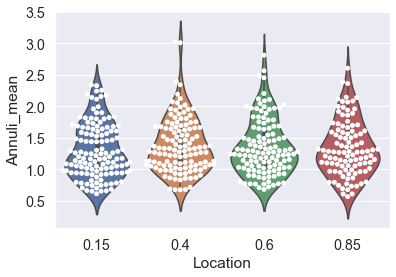

In [7]:

ax0 = sns.barplot(x = "Location", y = "Annuli_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual])
plt.show()
ax1 = sns.barplot(x = "Location", y = " DMT_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual])
plt.show()

sns.violinplot(x="Location", y="Annuli_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual])
sns.swarmplot(x="Location", y="Annuli_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual], color="white", edgecolor="gray")


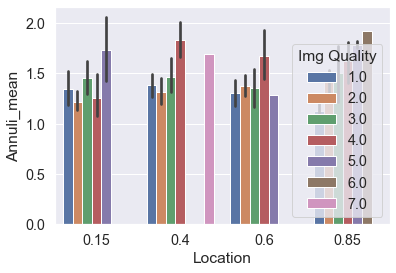

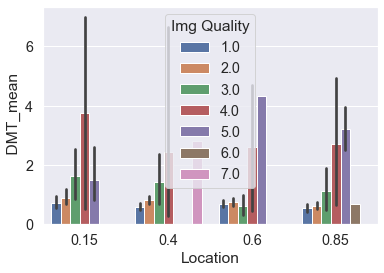

In [8]:
ax1 = sns.barplot(x = "Location", y = "Annuli_mean", hue="Img Quality", data=AFMdata)
plt.show()
ax2 = sns.barplot(x = "Location", y = " DMT_mean", hue="Img Quality", data=AFMdata)
plt.show()

In [9]:
MyGenoList [3]


NameError: name 'MyGenoList' is not defined

### Annuli width plot for each genotype and each location

[1.68945723 1.72721944 1.83657701 1.7264239 ]
[1.71563766 1.77624665 1.77852221 1.72924916]
N2


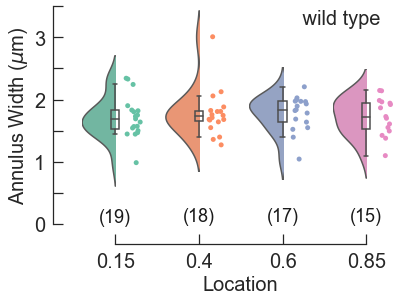

[1.63571083 1.67782317 1.47645505 1.56430906]
[1.70250666 1.66739531 1.56394948 1.65459903]
CB164


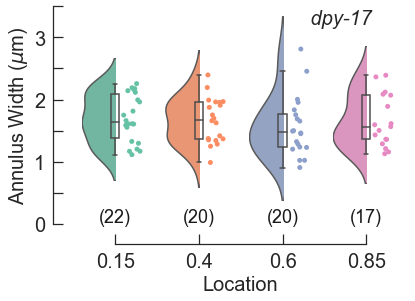

[1.18553921 1.28466377 1.29763944 1.27035056]
[1.24671447 1.43740428 1.41743128 1.35967445]
CB184


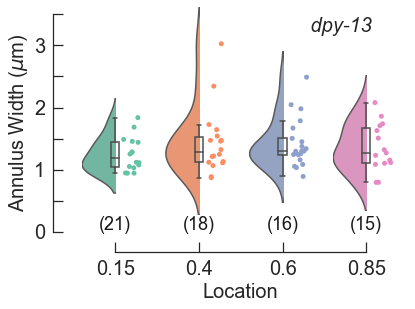

[1.25397349 1.22312221 1.1375937  1.15702975]
[1.33097967 1.22320375 1.22955103 1.19140557]
CB61


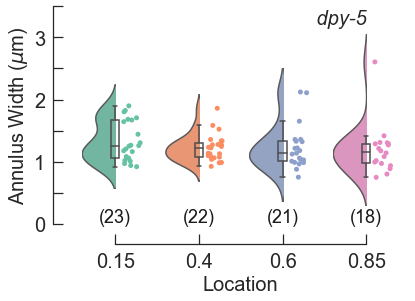

[1.00992271 1.05447281 0.94224721 1.02408607]
[0.99159258 1.08338091 1.05776399 1.00584973]
CB128


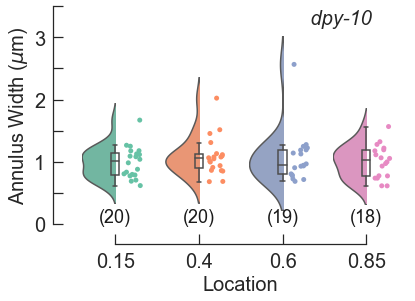

[0.92221659 1.04031103 1.1027719  0.96846804]
[0.91476074 1.11813813 1.08907597 1.03371459]
CB88


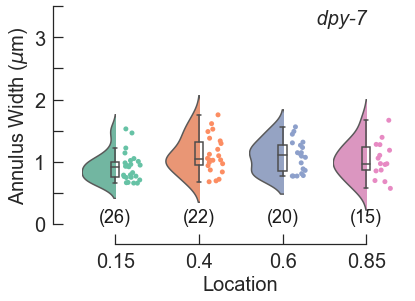

In [10]:
sns.set_style('ticks')
#sns.set_style('white')
palette = 'Set2'

MyGenoList = (['wild type','dpy-17','dpy-13','dpy-5','dpy-10','dpy-7'])
ji=0
for Strains in Genotyps_list:
    ThisGenotype=MyGenoList [ji]
    ji=ji+1
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    This_df=df_strn[df_strn['Img Quality'] <= 3]
    ax = sns.violinplot(x="Location", y="Annuli_mean", data=This_df,  dodge=False,
                        palette=palette,
                        scale="width", inner=None)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

    sns.boxplot(x="Location", y="Annuli_mean", data=This_df, saturation=1, showfliers=False,
                width=0.1, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
    old_len_collections = len(ax.collections)
    sns.stripplot(x="Location", y="Annuli_mean", data=This_df, hue="Location", palette=palette, dodge=False, ax=ax)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.2, 0]))
        
            # Calculate number of obs per group & median to position labels
    medians = This_df.groupby(["Location"])["Annuli_mean"].median().values
    means = This_df.groupby(["Location"])["Annuli_mean"].mean().values
    print(medians)
    print(means)
    print(Strains)
    nobs = This_df['Location'].value_counts().values
    nobs = ["("+ str(x)+")" for x in nobs.tolist()]
    #nobs = [str(i) for i in nobs]
    pos = range(len(nobs))
    for tick, label in zip(pos, ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] - .98*medians[tick], nobs[tick],
                horizontalalignment='center', fontsize=18 , color='k', weight='normal')
    ax.set(ylim=(0, 3.5))
    ax.set_ylabel("Annulus Width ($\mu$m)", size = 20)
    ax.set_xlabel("Location", size = 20)

    ax.legend_.remove()
    sns.despine(offset=20, trim=True);
    ax.tick_params('both', length=10, width=1.25, which='major')
    majors = ["0"," ", "1","", "2","", "3"]
    ax.yaxis.set_major_formatter(ticker.FixedFormatter(majors))
    ax.tick_params(axis="y",direction="in", pad=8)
    ax.tick_params(axis="x",direction="in", pad=8)
    
    plt.title(" %s "% ThisGenotype, fontdict= { 'fontsize': 20, 'fontweight':'normal','fontstyle':'italic' },x=.8, y=.89)
    if Strains=="N2":
        plt.title(" %s "% ThisGenotype, fontdict= { 'fontsize': 20, 'fontweight':'normal','fontstyle':'normal' },x=.8, y=.89)    
 
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    
    for index, label in enumerate(ax.get_yticklabels()):
        if index % 2 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    ax.figure.savefig('AnnuliWidth'+str(Strains) +'.tiff', dpi=200, bbox_inches='tight')

### Cuticle Stiffness plot for each genotype and each location

[0.29268376 0.32566385 0.43855932 0.40316745]
[0.38649727 0.53840063 0.49495504 0.52854689]
N2


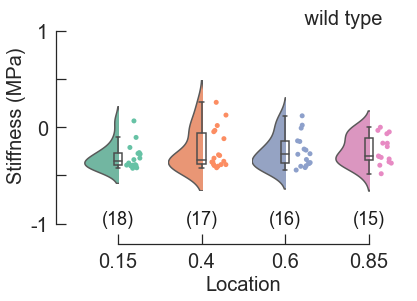

[0.61296498 0.41811116 0.5959568  0.41201183]
[0.69102172 0.46283463 0.62446272 0.70944386]
CB164


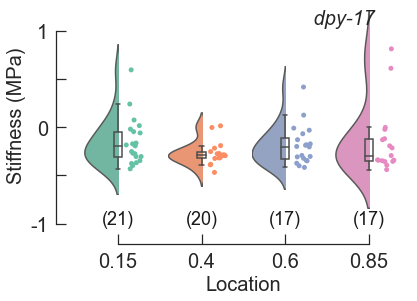

[0.83955761 0.63552301 0.62490031 0.66979865]
[0.94225163 0.80589213 0.79836606 0.70829359]
CB184


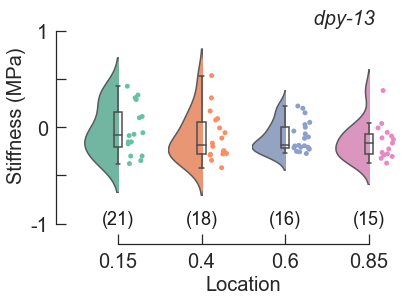

[0.94133344 0.32253778 0.39435607 0.25652407]
[1.0391075  0.75349866 0.82414349 0.64442607]
CB61


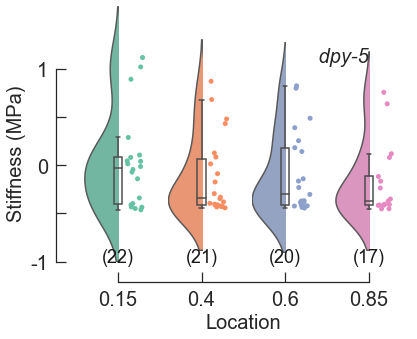

[0.73026627 0.70161403 0.68758887 0.59605114]
[0.89990625 0.85874778 0.92318476 0.63592738]
CB128


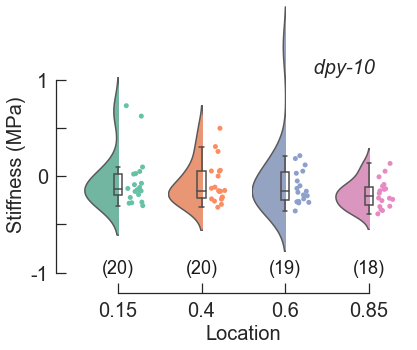

[0.38927713 0.52627869 0.56473156 0.42454037]
[0.48671563 0.61186485 0.58281154 0.44011517]
CB88


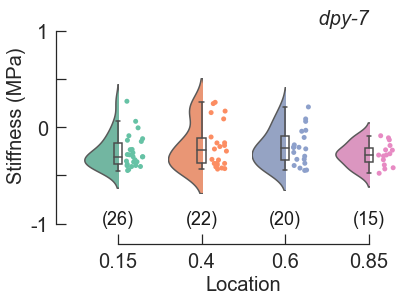

In [11]:
sns.set_style('ticks')
#sns.set_style('white')
palet = 'Set2'

MyGenoList = (['wild type','dpy-17','dpy-13','dpy-5','dpy-10','dpy-7'])
ji=0
for Strains in Genotyps_list:
    ThisGenotype=MyGenoList [ji]
    ji=ji+1
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    This_d=df_strn[df_strn['Img Quality'] <= 3]
    This_dff=This_d[This_d[' DMT_mean'] <= 4]

    axx = sns.violinplot(x="Location", y=" DMT_mean", data=This_dff,color="white",showfliers=False,
                      dodge=False, palette=palet,
                        scale="width", inner=None)


    xlim = axx.get_xlim()
    ylim = axx.get_ylim()
    for violin in axx.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=axx.transData))

    sns.boxplot(x="Location", y=" DMT_mean", data=This_dff, saturation=1, showfliers=False,
                width=0.1, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=axx)
    old_len_collections = len(axx.collections)
    sns.stripplot(x="Location", y=" DMT_mean", data=This_dff, hue="Location", palette=palet,dodge=False, ax=axx)
    for dots in axx.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.2, 0]))
        
            # Calculate number of obs per group & median to position labels
    medians = This_dff.groupby(["Location"])[" DMT_mean"].median().values
    means = This_dff.groupby(["Location"])[" DMT_mean"].mean().values
    print(medians)
    print(means)
    print(Strains)
    nobs = This_dff['Location'].value_counts().values
    nobs = ["("+ str(x)+")" for x in nobs.tolist()]
    #nobs = [str(i) for i in nobs]
    pos = range(len(nobs))
    for tick, label in zip(pos, axx.get_xticklabels()):
        axx.text(pos[tick], -1, nobs[tick],
                 horizontalalignment='center', fontsize=18 , color='k', weight='normal')

    axx.set(ylim=(-1, 3.5))
    axx.set_ylabel("Stiffness (MPa)", size = 20)
    axx.set_xlabel("Location", size = 20)

    axx.legend_.remove()
    sns.despine(offset=20, trim=True);
    axx.tick_params('both', length=10, width=1.25, which='major')
    majors = ["-1","","0"," ", "1","", "2","", "3"]
    axx.yaxis.set_major_formatter(ticker.FixedFormatter(majors))
    axx.tick_params(axis="y",direction="in", pad=8)
    axx.tick_params(axis="x",direction="in", pad=8)
    
    plt.title(" %s "% ThisGenotype, fontdict= { 'fontsize': 20, 'fontweight':'normal','fontstyle':'italic' },x=.8, y=.89)
    if Strains=="N2":
        plt.title(" %s "% ThisGenotype, fontdict= { 'fontsize': 20, 'fontweight':'normal','fontstyle':'normal' },x=.8, y=.89)    
 
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    
    for index, label in enumerate(axx.get_yticklabels()):
        if index % 2 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    #axx.set_yscale("log")
    plt.show()
    axx.figure.savefig('DMT_'+str(Strains) +'.tiff', dpi=200, bbox_inches='tight')

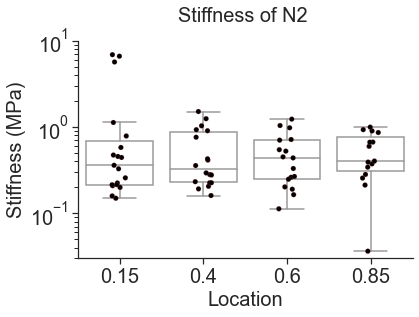

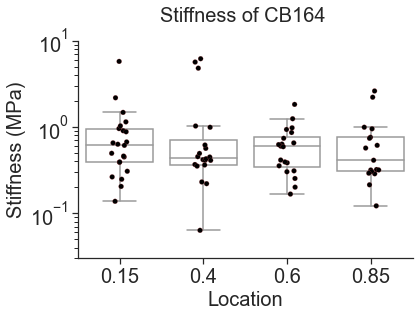

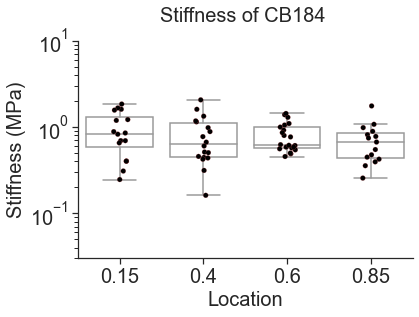

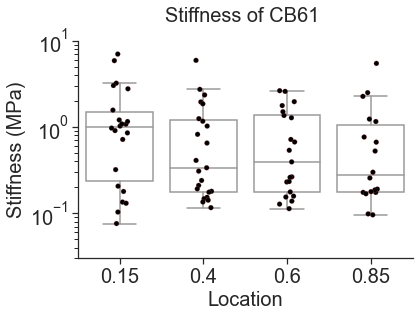

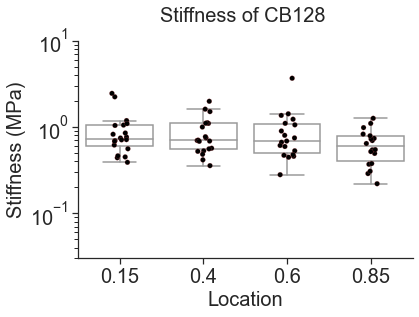

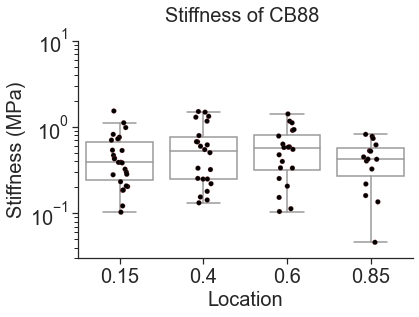

In [12]:
sns.set_style('ticks')
for Strains in Genotyps_list:
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    
    axx = sns.boxplot(x="Location", y=" DMT_mean", data=df_strn[df_strn['Img Quality'] <= 3],color="white",showfliers = False)

    # add stripplot with dodge=True
    sns.stripplot(x="Location", y=" DMT_mean", data=df_strn[df_strn['Img Quality'] <= 3],  dodge=True, ax=axx, ec='r', color="black", linewidth=.2)
    sns.despine();
    axx.set(ylim=(0.03, 10))
    axx.set_ylabel("Stiffness (MPa)", size = 20)
    axx.set_xlabel("Location", size = 20)
    axx.set_yscale("log")
    plt.title("Stiffness of %s " % Strains, y=1.06, size = 20)
    
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    plt.show()

    axx.figure.savefig('Log_DMT'+str(Strains) +'.tiff', dpi=200, bbox_inches='tight')


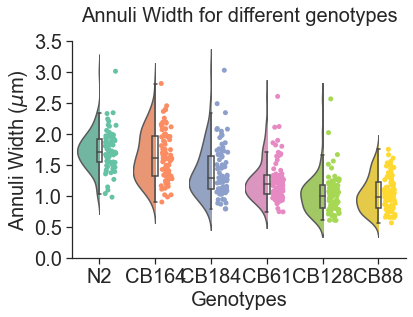

In [13]:
sns.set_style('ticks')
palette = 'Set2'
This_data=AFMdata[AFMdata['Img Quality'] <= 4]
axg = sns.violinplot(x="WormStrain", y="Annuli_mean", data=This_data,  dodge=False,
                    palette=palette, scale="width", inner=None)
xlim = axg.get_xlim()
ylim = axg.get_ylim()
for violin in axg.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=axg.transData))

sns.boxplot(x="WormStrain", y="Annuli_mean", data=This_data, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=axg)
old_len_collections = len(axg.collections)
sns.stripplot(x="WormStrain", y="Annuli_mean", data=This_data, palette=palette, dodge=False, ax=axg)
for dots in axg.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.2, 0]))
    
    # Calculate number of obs per group & median to position labels
medians = This_data.groupby(["WormStrain"])['Annuli_mean'].median().values
nobs = This_data['WormStrain'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
    # Add text to the figure
# pos = range(len(nobs))
# for tick, label in zip(pos, axg.get_xticklabels()):
#     axg.text(pos[tick], medians[tick] - .8*medians[tick], nobs[tick],
#             horizontalalignment='center',size='large',color='k',weight='semibold')

sns.set(font_scale = 1)    
axg.set(ylim=(0, 3.5))
axg.set_ylabel("Annuli Width ($\mu$m)", size = 20)
axg.set_xlabel("Genotypes", size = 20)

#axg.legend_.remove()
sns.despine();
plt.title("Annuli Width for different genotypes", y=1.06, size = 20)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.show()
axg.figure.savefig('AnnuDifferGeno'+'.tiff', dpi=200, bbox_inches='tight')

In [14]:
# Create New DataFrame of Specific column by DataFrame.assign() method.
dfESTISTAT = pd.DataFrame().assign(WormStrain=AFMdata['WormStrain'], Annuli_mean=AFMdata['Annuli_mean'],
                           ImgQuality=AFMdata['Img Quality'],DMT_mean=AFMdata[' DMT_mean'])
dfESTISTAT=dfESTISTAT[dfESTISTAT["ImgQuality"] <=3]

dfESTISTAT_wild=dfESTISTAT[dfESTISTAT["WormStrain"] =='N2'].reset_index(drop=True)
dfESTISTAT_dpy5=dfESTISTAT[dfESTISTAT["WormStrain"] =='CB61'].reset_index(drop=True)
dfESTISTAT_dpy13=dfESTISTAT[dfESTISTAT["WormStrain"] =='CB184'].reset_index(drop=True)
dfESTISTAT_dpy17=dfESTISTAT[dfESTISTAT["WormStrain"] =='CB164'].reset_index(drop=True)
dfESTISTAT_dpy7=dfESTISTAT[dfESTISTAT["WormStrain"] =='CB88'].reset_index(drop=True)
dfESTISTAT_dpy10=dfESTISTAT[dfESTISTAT["WormStrain"] =='CB128'].reset_index(drop=True)
######
dict_AnnuliWidth = {'wild type': dfESTISTAT_wild["Annuli_mean"], 'dpy5':dfESTISTAT_dpy5["Annuli_mean"]
    , 'dpy13':dfESTISTAT_dpy13["Annuli_mean"], 'dpy17':dfESTISTAT_dpy17["Annuli_mean"],'dpy7':dfESTISTAT_dpy7["Annuli_mean"]
    , 'dpy10':dfESTISTAT_dpy10["Annuli_mean"]} 
df_AnnuliWidth = pd.DataFrame(dict_AnnuliWidth)
########
dict_Stiff = {'wild type': dfESTISTAT_wild["DMT_mean"], 'dpy5':dfESTISTAT_dpy5["DMT_mean"]
    , 'dpy13':dfESTISTAT_dpy13["DMT_mean"], 'dpy17':dfESTISTAT_dpy17["DMT_mean"], 'dpy7':dfESTISTAT_dpy7["DMT_mean"]
    , 'dpy10':dfESTISTAT_dpy10["DMT_mean"]} 
df_Stiff = pd.DataFrame(dict_Stiff)
df_Stiffness = df_Stiff[df_Stiff < 4]
print(df_Stiffness)

    wild type      dpy5     dpy13     dpy17      dpy7     dpy10
0    0.455770  0.178947  1.149145  0.907046  1.536107  1.102293
1    0.905995  0.153004  1.053811       NaN  1.170756  1.060495
2    0.703973  0.157801  0.816055  1.147793  0.915318  1.263304
3    0.597417  0.098278  0.695725  1.028133  1.120687  0.618433
4    0.199312  0.910120  0.456066  0.634021  1.487859  1.001233
..        ...       ...       ...       ...       ...       ...
79        NaN  2.507308       NaN       NaN  0.737196       NaN
80        NaN  0.718139       NaN       NaN  0.822435       NaN
81        NaN  1.168066       NaN       NaN  1.514064       NaN
82        NaN  0.670826       NaN       NaN  1.119513       NaN
83        NaN  0.667720       NaN       NaN       NaN       NaN

[84 rows x 6 columns]


### Estimation statistics for annuli width and DMT

AttributeError: 'NoneType' object has no attribute 'savefig'

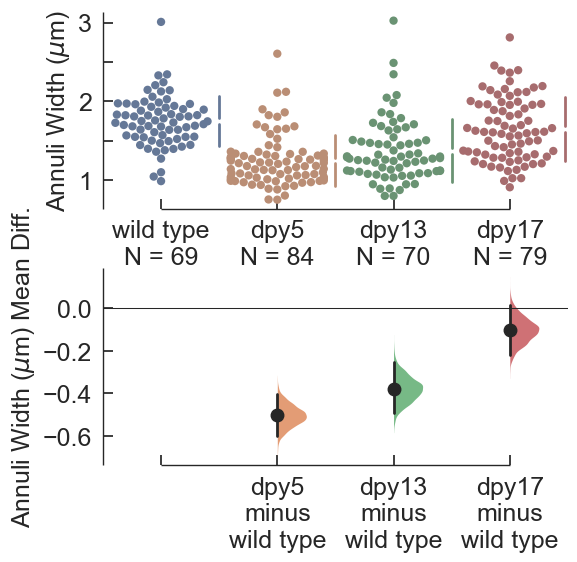

In [15]:
shared_control = dabest.load(df_AnnuliWidth, idx=("wild type", "dpy5", "dpy13", "dpy17") )
#print(shared_control.mean_diff.statistical_tests)


f = shared_control.mean_diff.plot( );

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
rawswarm_axes.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

rawswarm_axes.tick_params('both', length=7, width=1.25, which='major')
rawswarm_axes.tick_params('both', length=7, width=1.25, which='minor')
rawswarm_axes.tick_params(axis="y",direction="in", pad=8)
rawswarm_axes.tick_params(axis="y",direction="in", pad=8, which='minor')
rawswarm_axes.tick_params(axis="x",direction="in", pad=8)

rawswarm_axes.set_ylabel("Annuli Width ($\mu$m)",fontsize=18)

plt.setp(rawswarm_axes.get_xticklabels(), Fontsize=18)#, style='italic')
plt.setp(rawswarm_axes.get_yticklabels(), Fontsize=18)


contrast_axes.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
#contrast_axes.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.tick_params('both', length=7, width=1.25, which='major')
plt.tick_params(axis="y",direction="in", pad=8)
plt.tick_params(axis="x",direction="in", pad=8)


plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel("Annuli Width ($\mu$m) Mean Diff.",fontsize=18, rotation=90)

for index, label in enumerate(ax.get_yticklabels()):
    if index % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)


f.figure.savefig('EstiStat_AnnuliW'+'.tiff', dpi=200, bbox_inches='tight')

In [ ]:
print('\it${time (s)}$')


AttributeError: 'NoneType' object has no attribute 'savefig'

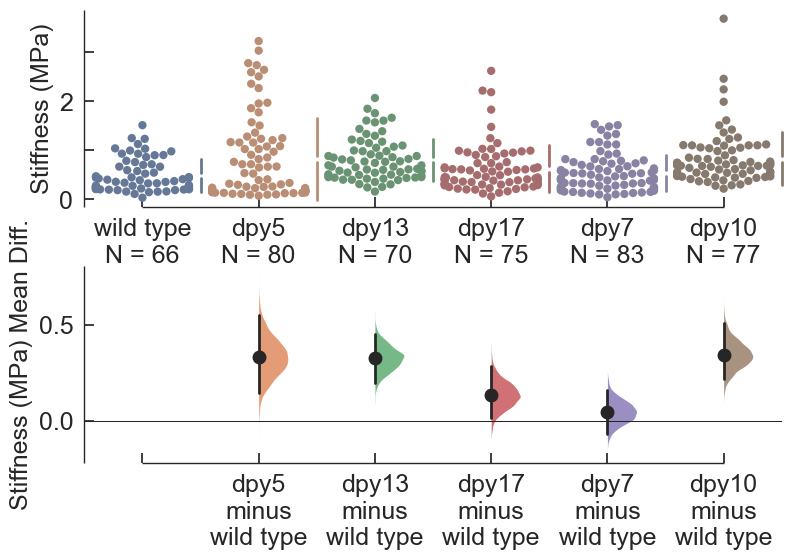

In [16]:
shared_control = dabest.load(df_Stiffness, idx=("wild type", "dpy5", "dpy13", "dpy17", "dpy7", "dpy10") )
#print(shared_control.mean_diff.statistical_tests)
f_DMT = shared_control.mean_diff.plot( );

rawswarm_axes = f_DMT.axes[0]
contrast_axes = f_DMT.axes[1]

rawswarm_axes.yaxis.set_major_locator(ticker.MultipleLocator(2))
rawswarm_axes.yaxis.set_minor_locator(ticker.MultipleLocator(1))

rawswarm_axes.tick_params('both', length=7, width=1.25, which='major')
rawswarm_axes.tick_params('both', length=7, width=1.25, which='minor')
rawswarm_axes.tick_params(axis="y",direction="in", pad=8)
rawswarm_axes.tick_params(axis="y",direction="in", pad=8, which='minor')
rawswarm_axes.tick_params(axis="x",direction="in", pad=8)

rawswarm_axes.set_ylabel("Stiffness (MPa)",fontsize=18)

plt.setp(rawswarm_axes.get_xticklabels(), Fontsize=18)#, style='italic')
plt.setp(rawswarm_axes.get_yticklabels(), Fontsize=18)


contrast_axes.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#contrast_axes.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.tick_params('both', length=7, width=1.25, which='major')
plt.tick_params(axis="y",direction="in", pad=8)
plt.tick_params(axis="x",direction="in", pad=8)


plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel("Stiffness (MPa) Mean Diff.",fontsize=18, rotation=90)

for index, label in enumerate(ax.get_yticklabels()):
    if index % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
f_DMT.figure.savefig('EstiStat_Stiffness'+'.tiff', dpi=200, bbox_inches='tight')

### One-way ANOVA

In [17]:
for Strains in Genotyps_list:
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    Loc_15 = df_strn[df_strn["Location"]==0.15]["Annuli_mean"]
    Loc_40 = df_strn[df_strn["Location"]==0.40]["Annuli_mean"]
    Loc_60 = df_strn[df_strn["Location"]==0.60]["Annuli_mean"]
    Loc_85 = df_strn[df_strn["Location"]==0.85]["Annuli_mean"]

    # Conduct the one-way ANOVA
    print(Strains)
    print(f_oneway(Loc_15, Loc_40, Loc_60, Loc_85))

N2
F_onewayResult(statistic=0.12484537924992432, pvalue=0.945146293657277)
CB164
F_onewayResult(statistic=0.5138279578354806, pvalue=0.673964298112296)
CB184
F_onewayResult(statistic=1.6309765333929167, pvalue=0.18921501798852544)
CB61
F_onewayResult(statistic=0.4953142147169731, pvalue=0.6865327035183578)
CB128
F_onewayResult(statistic=0.36365146734195813, pvalue=0.7794286205399512)
CB88
F_onewayResult(statistic=2.7177913058762626, pvalue=0.05006102897468106)


In [18]:
for Strains in Genotyps_list:
    df_strn = AFMdata[AFMdata["WormStrain"]==Strains]
    Loc_15 = df_strn[df_strn["Location"]==0.15][" DMT_mean"]
    Loc_40 = df_strn[df_strn["Location"]==0.40][" DMT_mean"]
    Loc_60 = df_strn[df_strn["Location"]==0.60][" DMT_mean"]
    Loc_85 = df_strn[df_strn["Location"]==0.85][" DMT_mean"]

    # Conduct the one-way ANOVA
    print(Strains)
    print(f_oneway(Loc_15, Loc_40, Loc_60, Loc_85))

N2
F_onewayResult(statistic=1.3421671028995898, pvalue=0.26691452008201877)
CB164
F_onewayResult(statistic=0.529033344492651, pvalue=0.6636842194253472)
CB184
F_onewayResult(statistic=0.714172176264535, pvalue=0.546537099396871)
CB61
F_onewayResult(statistic=1.0123087148330339, pvalue=0.39161343897826084)
CB128
F_onewayResult(statistic=1.1254070204654518, pvalue=0.3444727768162685)
CB88
F_onewayResult(statistic=0.3673290802153134, pvalue=0.7767690567030475)


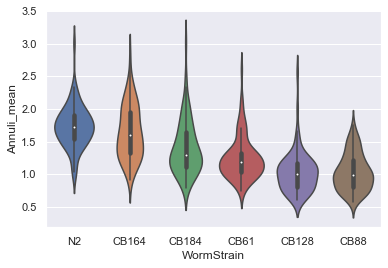

In [19]:
AllAnu=sns.violinplot(x="WormStrain", y="Annuli_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual])
#AllAnu=sns.swarmplot(x="WormStrain", y="Annuli_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual], color="white", edgecolor="gray")
#AllAnu.figure.savefig('AllAnul'+'.tiff', dpi=200, bbox_inches='tight')

[Text(0, 0, 'wild type'),
 Text(1, 0, '$\\it dpy-5 $'),
 Text(2, 0, '$\\it dpy-13$'),
 Text(3, 0, '$\\it dpy-17$'),
 Text(4, 0, '$\\it dpy-7$'),
 Text(5, 0, '$\\it dpy-10$')]

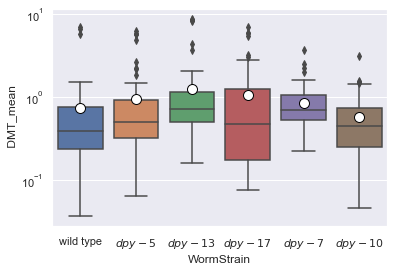

In [20]:
AllDMT=sns.boxplot(x="WormStrain", y=" DMT_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual],showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#AllDMT=sns.swarmplot(x="WormStrain", y=" DMT_mean", data=AFMdata[AFMdata['Img Quality'] <= ImgQual], color="black", edgecolor="gray")
AllDMT.set_yscale("log")
AllDMT.set_xticklabels(['wild type','$\it dpy-5 $','$\it dpy-13$','$\it dpy-17$','$\it dpy-7$','$\it dpy-10$'])
#AllDMT.figure.savefig('AllDMT'+'.tiff', dpi=200, bbox_inches='tight')

## Below is the Tukeys test table 

In [21]:
mask = data['WormStrain']=='N2'
Geno_data = data[mask]
MultiComp = MultiComparison(Geno_data['WormStrain'], Geno_data['Annuli_mean'])
# Show all pair-wise comparisons:
# Print the comparisons
#print(MultiComp.tukeyhsd().summary())
#plt.rc('figure', figsize=(12, 5))
#plt.text(0.01, 0.05, str(MultiComp.tukeyhsd().summary()), {'fontsize': 22}, fontproperties = 'monospace') # approach improved by OP -> monospace!
#plt.axis('off')
#plt.savefig('Tukeys_Loc.tiff',dpi=300)

NameError: name 'data' is not defined

## Test the normal distribution of data, the greater vaues means normality. Values below 0.05 not considered to be normally distributed

In [22]:
print("N2: ", normaltest(N2).pvalue)
print("CB61: ", normaltest(CB61).pvalue)
print("CB88: ", normaltest(CB88).pvalue)
print("CB128: ", normaltest(CB128).pvalue)
print("CB164: ", normaltest(CB164).pvalue)
print("CB184: ", normaltest(CB184).pvalue)
print()

NameError: name 'N2' is not defined

### BoxPlot of pool of data set for each genotype

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N2 vs. CB164: Custom statistical test, P_val:6.069e-02
N2 vs. CB184: Custom statistical test, P_val:5.247e-10
N2 vs. CB61: Custom statistical test, P_val:8.786e-16
N2 vs. CB88: Custom statistical test, P_val:6.242e-22
N2 vs. CB128: Custom statistical test, P_val:1.663e-20


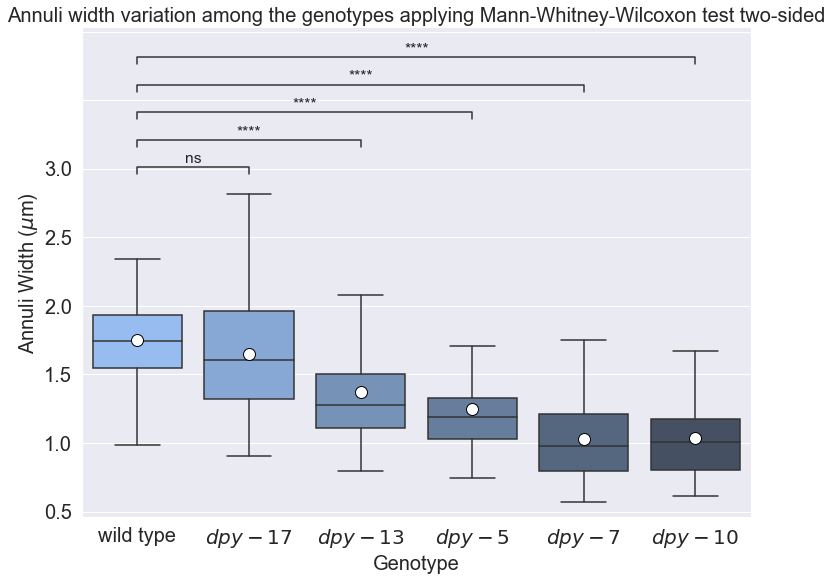

In [23]:
data=AFMdata[AFMdata['Img Quality'] <= 3]
rfs = data.loc[(data.WormStrain.isin(("N2", "CB164", "CB184", "CB61", "CB88", "CB128"))), :]

subcat_paletteE = sns.dark_palette("#8BF", reverse=True, n_colors=8)
subcat_order = ["N2", "CB164", "CB184", "CB61", "CB88", "CB128"]
#subcat_order = [(0,0),(5,5),(8,8),(10,10),(30,30)]

N2 = rfs.loc[(rfs.WormStrain == "N2"), "Annuli_mean"].values
CB61 = rfs.loc[(rfs.WormStrain == "CB61"), "Annuli_mean"].values
CB88 = rfs.loc[(rfs.WormStrain == "CB88"), "Annuli_mean"].values
CB128 = rfs.loc[(rfs.WormStrain == "CB128"), "Annuli_mean"].values
CB164 = rfs.loc[(rfs.WormStrain == "CB164"), "Annuli_mean"].values
CB184 = rfs.loc[(rfs.WormStrain == "CB184"), "Annuli_mean"].values

stat_results = [mannwhitneyu(N2, CB61, alternative="two-sided"),
                mannwhitneyu(N2, CB88, alternative="two-sided"),
                mannwhitneyu(N2, CB128, alternative="two-sided"),
                mannwhitneyu(N2, CB164, alternative="two-sided"),
                mannwhitneyu(N2, CB184, alternative="two-sided")]

pvalues = [result.pvalue for result in stat_results]

plotting_parameters = {
    'data':    rfs,
    'x':       'WormStrain',
    'y':       'Annuli_mean',
    'order':   subcat_order,
    'palette': subcat_paletteE,
}

pairs = [('N2', 'CB61'),
         ('N2', 'CB88'),
         ('N2', 'CB128'),
         ('N2', 'CB164'),
         ('N2', 'CB184')
]

def get_ax(orient="v"):
    if orient == "v":
        figsize = (12, 9)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    getattr(ax, set_scale)("linear")
    return ax

def label_plot(ax):
    plt.title("Annuli width variation among the genotypes applying Mann-Whitney-Wilcoxon test two-sided", y=1,fontsize=20)
    ax.set_ylabel("Annuli Width ($\mu$m)", fontsize=20)
    ax.set_xlabel("Genotype", labelpad=5, fontsize=20)

with sns.plotting_context("notebook", font_scale=1.3):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    sns.boxplot(ax=ax, **plotting_parameters, showfliers=False,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"12"})
    ax.set_xticklabels(['wild type','$\it dpy-17$','$\it dpy-13$','$\it dpy-5 $','$\it dpy-7$','$\it dpy-10$'], size=20)
    ax.set_yticklabels(ax.get_yticks(), size=20)
    #Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    label_plot(ax)
    sns.despine();
    plt.savefig("./AnnuliBOX_M0W.tiff", bbox_inches='tight',dpi=100)
    #ax.figure.savefig('WormStiff20220201.tiff',dpi=100)
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

N2 vs. CB164: Custom statistical test, P_val:4.863e-02
N2 vs. CB184: Custom statistical test, P_val:1.192e-05
N2 vs. CB61: Custom statistical test, P_val:5.811e-01
N2 vs. CB88: Custom statistical test, P_val:8.503e-01
N2 vs. CB128: Custom statistical test, P_val:3.958e-06


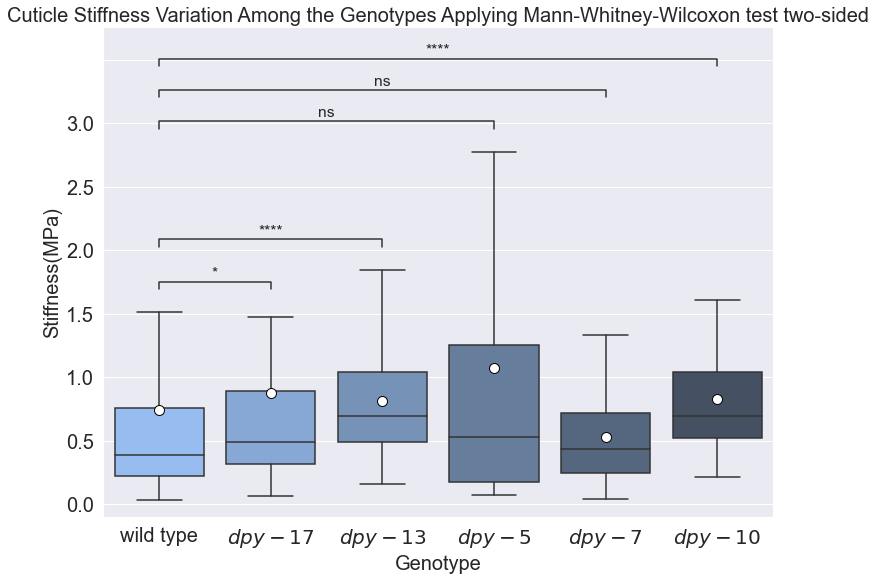

In [24]:
data=AFMdata[AFMdata['Img Quality'] <= 3]
rfs = data.loc[(data.WormStrain.isin(("N2", "CB164", "CB184", "CB61", "CB88", "CB128"))), :]

subcat_paletteE = sns.dark_palette("#8BF", reverse=True, n_colors=8)
subcat_order = ["N2", "CB164", "CB184", "CB61", "CB88", "CB128"]
#subcat_order = [(0,0),(5,5),(8,8),(10,10),(30,30)]

N2 = rfs.loc[(rfs.WormStrain == "N2"), " DMT_mean"].values
CB61 = rfs.loc[(rfs.WormStrain == "CB61"), " DMT_mean"].values
CB88 = rfs.loc[(rfs.WormStrain == "CB88"), " DMT_mean"].values
CB128 = rfs.loc[(rfs.WormStrain == "CB128"), " DMT_mean"].values
CB164 = rfs.loc[(rfs.WormStrain == "CB164"), " DMT_mean"].values
CB184 = rfs.loc[(rfs.WormStrain == "CB184"), " DMT_mean"].values

stat_results = [mannwhitneyu(N2, CB61, alternative="two-sided"),
                mannwhitneyu(N2, CB88, alternative="two-sided"),
                mannwhitneyu(N2, CB128, alternative="two-sided"),
                mannwhitneyu(N2, CB164, alternative="two-sided"),
                mannwhitneyu(N2, CB184, alternative="two-sided")]

pvalues = [result.pvalue for result in stat_results]

plotting_parameters = {
    'data':    rfs,
    'x':       'WormStrain',
    'y':       ' DMT_mean',
    'order':   subcat_order,
    'palette': subcat_paletteE,
}

pairs = [('N2', 'CB61'),
         ('N2', 'CB88'),
         ('N2', 'CB128'),
         ('N2', 'CB164'),
         ('N2', 'CB184')
]

def get_ax(orient="v"):
    if orient == "v":
        figsize = (12, 9)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    getattr(ax, set_scale)("linear")
    return ax

def label_plot(ax):
    plt.title("Cuticle Stiffness Variation Among the Genotypes Applying Mann-Whitney-Wilcoxon test two-sided", y=1,fontsize=20)
    ax.set_ylabel("Stiffness(MPa)",fontsize=20)
    ax.set_xlabel("Genotype", labelpad=5,fontsize=20)

with sns.plotting_context("notebook", font_scale=1.3):
    # Create new plot
    ax = get_ax()

    # Plot with seaborn
    sns.boxplot(ax=ax, **plotting_parameters, showfliers=False,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax.set_xticklabels(['wild type','$\it dpy-17$','$\it dpy-13$','$\it dpy-5 $','$\it dpy-7$','$\it dpy-10$'], size=20)
    ax.set_yticklabels(ax.get_yticks(), size=20)
    #Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    # Label and show
    label_plot(ax)
    sns.despine();
    plt.savefig("./DMTBOX_M0W.tiff", bbox_inches='tight',dpi=100)
    #ax.figure.savefig('WormStiff20220201.tiff',dpi=100)
    plt.show()